![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/04_Hyperparameter%20Tuning%20with%20Cross%20Validation/04_cross-validation_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Load the Data

- We take some dataset from the _[Machine Learning Data Repository UCI](https://archive.ics.uci.edu/ml/datasets/adult)_
- The aim is to predict weather a **person** (rows) `earned>50k` a year or not
- Based on their **social-demographic features** (columns)

PD: You may see the column names & meanings [here ↗](https://archive.ics.uci.edu/ml/datasets/adult).

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df_salary = pd.read_csv(url, header=None, na_values=' ?')
df_salary.rename(columns={14: 'target'}, inplace=True)
df_salary.columns = [str(i) for i in df_salary.columns]
df_salary.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Preprocess the Data

*1. Check if there are missing data*

In [2]:
df_salary.isnull().sum()

0            0
1         1836
2            0
3            0
4            0
5            0
6         1843
7            0
8            0
9            0
10           0
11           0
12           0
13         583
target       0
dtype: int64

In [3]:
df_salary = df_salary.dropna()

*2. Convert numerical data to categorical data*

In [4]:
df_salary = pd.get_dummies(df_salary, drop_first=True)

In [5]:
df_salary.head()

,0,2,4,10,11,12,1_ Local-gov,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,6_ Other-service,6_ Priv-house-serv,6_ Prof-specialty,6_ Protective-serv,6_ Sales,6_ Tech-support,6_ Transport-moving,7_ Not-in-family,7_ Other-relative,7_ Own-child,7_ Unmarried,7_ Wife,8_ Asian-Pac-Islander,8_ Black,8_ Other,8_ White,9_ Male,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia,target_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Feature Selection

In [6]:
X = df_salary.drop(columns="target_ >50K")

In [7]:
y = df_salary["target_ >50K"]

In [8]:
X.head()

,0,2,4,10,11,12,1_ Local-gov,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,6_ Other-service,6_ Priv-house-serv,6_ Prof-specialty,6_ Protective-serv,6_ Sales,6_ Tech-support,6_ Transport-moving,7_ Not-in-family,7_ Other-relative,7_ Own-child,7_ Unmarried,7_ Wife,8_ Asian-Pac-Islander,8_ Black,8_ Other,8_ White,9_ Male,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target_ >50K, dtype: uint8

## `train_test_split()` the Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## `DecisionTreeClassifier()` with Default Hyperparameters

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
model_dt = DecisionTreeClassifier()

In [14]:
model_dt.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

### Accuracy

#### > In `train` data

In [15]:
model_dt.score(X=X_train, y=y_train)

1.0

#### > In `test` data

In [16]:
model_dt.score(X=X_test, y=y_test)

0.8117339762909384

### Model Visualization

In [17]:
from sklearn.tree import plot_tree

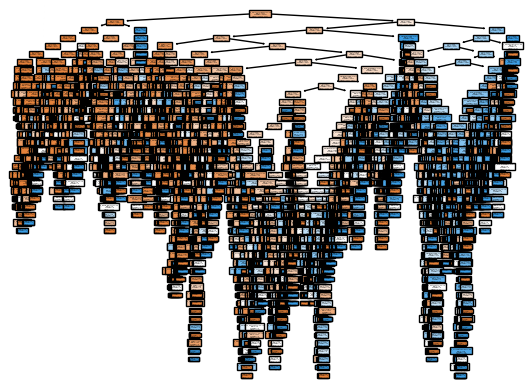

In [18]:
plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

## Interpretation

- [X] Why the difference on accuracy is so much?
> *Because we didn´t pass any hyperparameters to get a better model results*

## `DecisionTreeClassifier()` with Custom Hyperparameters

In [19]:
model_dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=200)

In [20]:
model_dt.fit(X=X_train, y=y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=200)

### 1st Configuration

#### Accuracy

##### > In `train` data

In [21]:
model_dt.score(X=X_train, y=y_train)

0.8241785431512272

##### > In `test` data

In [22]:
model_dt.score(X=X_test, y=y_test)

0.824291742013261

*Note how now we get similar results of score*

#### Model Visualization

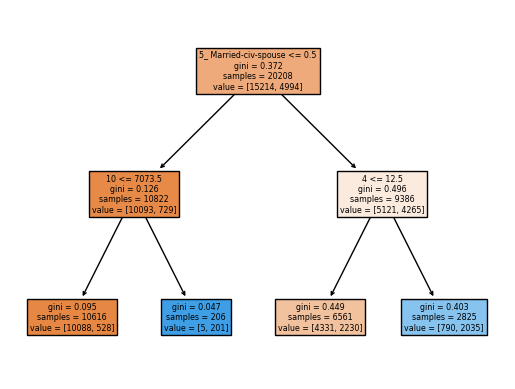

In [23]:
plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

### 2nd Configuration

In [24]:
model_dt = DecisionTreeClassifier(criterion="entropy",min_samples_split=10)

In [25]:
model_dt.fit(X=X_train, y=y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

In [26]:
model_dt.score(X=X_train, y=y_train)

0.9490795724465558

In [27]:
model_dt.score(X=X_test, y=y_test)

0.8166566204540888

### 3rd Configuration

In [28]:
model_dt = DecisionTreeClassifier(min_samples_leaf=200)

In [29]:
model_dt.fit(X=X_train, y=y_train)

DecisionTreeClassifier(min_samples_leaf=200)

In [30]:
model_dt.score(X=X_train, y=y_train)

0.8472882026920031

In [31]:
model_dt.score(X=X_test, y=y_test)

0.8452883263009845

### 4th Configuration

In [32]:
model_dt = DecisionTreeClassifier(max_leaf_nodes=400)

In [33]:
model_dt.fit(X=X_train, y=y_train)

DecisionTreeClassifier(max_leaf_nodes=400)

In [34]:
model_dt.score(X=X_train, y=y_train)

0.8971694378463975

In [35]:
model_dt.score(X=X_test, y=y_test)

0.8468957203134418

### 5th Configuration

In [36]:
model_dt = DecisionTreeClassifier(min_samples_leaf=6, splitter="random")

In [37]:
model_dt.fit(X=X_train, y=y_train)

DecisionTreeClassifier(min_samples_leaf=6, splitter='random')

In [38]:
model_dt.score(X=X_train, y=y_train)

0.8783155186064925

In [39]:
model_dt.score(X=X_test, y=y_test)

0.8310227044404259

## `GridSearchCV()` to find Best Hyperparameters

In [40]:
model_dt = DecisionTreeClassifier() #will be the estimator parameter of the GridSearchCV object

In [41]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [42]:
param_grid = { #this dictionary will hold the parameters that we want to test with the GridSearchCV object
    
    "criterion" : ["gini", "entropy", "log_loss"],
    "max_depth" : [40, 50, 100, 150],
    "min_samples_leaf" : [2, 5, 6 , 20, 50, 100, 120]
}

*Now, we call the function fit inside de `cv_dt` variable*

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
cv_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, verbose=1) #with 5 as cv, will do 5 iterations per test

In [45]:
cv_dt.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [40, 50, 100, 150],
                         'min_samples_leaf': [2, 5, 6, 20, 50, 100, 120]},
             verbose=1)

In [46]:
cv_dt.best_params_

{'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 50}

In [47]:
cv_dt.best_score_

0.8458530762308799

## Other Models

### Support Vector Machines `SVC()`

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [48]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
from sklearn.svm import SVC

In [93]:
model_svc = SVC()

In [94]:
model_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [95]:
param_grid = {
    "kernel" : ['linear', "rbf"],
    "class_weight" : ['balanced']
}

In [96]:
cv_svc = GridSearchCV(estimator=model_svc, param_grid=param_grid, verbose=1)

*Before calling the `cv_svc.fit()` function inside the CV object, we need to scale the data because SVM compares the distance between the explanatory variables, so they need to be in the same scale*

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler = MinMaxScaler()

In [99]:
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [100]:
#We separe again the data, but now its scaled
X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

*Finally, we can run the CV and find the best combination of hyperarameters given our own `param_grid`*

In [101]:
cv_svc.fit(X=X_norm_train, y=y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(estimator=SVC(),
             param_grid={'class_weight': ['balanced'],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [102]:
cv_svc.best_params_

{'class_weight': 'balanced', 'kernel': 'linear'}

In [104]:
cv_svc.best_score_

0.7813241097160831

### K Nearest Neighbors `KNeighborsClassifier()`

In [105]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HVXime0nQeI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
model_kn = KNeighborsClassifier()

In [109]:
param_grid = {
    "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "leaf_size" : [20, 30, 50]
}

In [110]:
from sklearn.model_selection import GridSearchCV

In [113]:
cv_kn = GridSearchCV(estimator=model_kn, param_grid=param_grid, verbose=1)

In [114]:
cv_kn.fit(X_norm_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 50]},
             verbose=1)

In [115]:
cv_kn.best_params_

{'algorithm': 'auto', 'leaf_size': 20}

In [116]:
cv_kn.best_score_

0.8191808578595865

# Best Model with Best Hyperparameters

In [117]:
df_scores = pd.DataFrame()

In [118]:
df_scores["model"] = [cv_dt.best_estimator_, cv_kn.best_estimator_, cv_svc.best_estimator_]
df_scores["score"] = [cv_dt.best_score_, cv_kn.best_score_, cv_svc.best_score_]

In [120]:
df_scores.style.background_gradient()

,model,score
0,"DecisionTreeClassifier(max_depth=40, min_samples_leaf=50)",0.845853
1,KNeighborsClassifier(leaf_size=20),0.819181
2,"SVC(class_weight='balanced', kernel='linear')",0.781324


*The best model is `DecisionTreeClassifier()` with 84% score and **max_depth=40, min_samples_leaf=50** as parameters*

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [X] Even a model can be bettered
- [X] The goal is to make models that perform a better accuracy on data not seen
    - The banks would like to know if a **future client** will be able to pay the loan
    - Not a past client
    - Unfortunately, we do not have data for future clients
    - So, we fix this with `Data Splitting` into
        - Train
            - Fold Validation
        - Test
- [X] Understand the Machine Learning Applications to businesses
    - To predict if a customer will pay the loan
    - To predict if an athlete will have an injury